# Abstract

This project uses the 201411 Citi Bike data and the null hypothesis is that the number of old people who use Citi Bike is not less than the number of young people. I calculate each day the number of old people and young people who ride Citi bike in 201411. Then use the t-test to see can we reject the null hypothesis. As the t-score is 3.98257350289. So we can reject the null hypothesis. The Conclusion is that the number of old people who use Citi bike is less than the number of young people.

# Introduction

Citi Bike Project offers people a fun and affordable way to get around town. As Citi Bike involves into the NYC open data, we can use those data to analyze some aspects we are interested in. Riding bike is a physical consuming work, so it is reasonable to raise a question if the number of old people who ride Citi bike is less than the number of young people who ride Citi Bike. In this project, old means people age above 45 and young means people under 45.

# Data

In this project, I use 2014-11 Citi Bike data. The raw data has 16 columns, but only the 'startime' and 'birth year' is useful for this analysis. So I drop other columns and turn 'birth year' into 'age'. Then I calculate each day the number of old people and young people who use Citi Bike and plot them.

## Null hypothesis: The number of old people who use citi bike is not less than the number of young people 

# _$H_0$_ :  $Age\_above\_45_{\mathrm{count\_day}} >= {Age\_under\_45_{\mathrm{count\_day}}}$

# _$H_1$_ :  $Age\_above\_45_{\mathrm{count\_day}} < {Age\_under\_45_{\mathrm{count\_day}}}$

## I will use a significance level  $\alpha=0.05$

### which means i want the probability of getting a result at least as significant as mine to be less then 5%

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
    puidata = os.getenv("PUIDATA")

In [3]:
# download 201411 citibike data

#! curl -O https://s3.amazonaws.com/tripdata/201411-citibike-tripdata.zip
#! mv 201411-citibike-tripdata.zip $PUIDATA
#! unzip $PUIDATA/201411-citibike-tripdata.zip 
#! mv 201411-citibike-tripdata.csv $PUIDATA


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + '/201411-citibike-tripdata.csv')
df.head()

df['date'] = pd.to_datetime(df['starttime'])

In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [6]:
df.shape

(529188, 16)

In [7]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'gender'], axis=1, inplace=True)

In [8]:
df.head()

,birth year,date
0,1983.0,2014-11-01 00:00:11
1,1980.0,2014-11-01 00:00:11
2,1981.0,2014-11-01 00:00:38
3,1982.0,2014-11-01 00:00:49
4,1979.0,2014-11-01 00:00:56


In [9]:
df['age'] = 2018 - df['birth year']
df.head()

,birth year,date,age
0,1983.0,2014-11-01 00:00:11,35.0
1,1980.0,2014-11-01 00:00:11,38.0
2,1981.0,2014-11-01 00:00:38,37.0
3,1982.0,2014-11-01 00:00:49,36.0
4,1979.0,2014-11-01 00:00:56,39.0


In [10]:
df.drop(['birth year'], axis=1, inplace=True)

In [11]:
df.head()

,date,age
0,2014-11-01 00:00:11,35.0
1,2014-11-01 00:00:11,38.0
2,2014-11-01 00:00:38,37.0
3,2014-11-01 00:00:49,36.0
4,2014-11-01 00:00:56,39.0


In [12]:
citi_agenum = df_empty = pd.DataFrame()
citi_agenum['old'] = df['date'][df['age'] >= 45].groupby([df['date'].dt.day]).count()
citi_agenum['young'] = df['date'][df['age'] < 45].groupby([df['date'].dt.day]).count()
citi_agenum.head()

,old,young
date,,
1,1802,3887
2,4189,8758
3,9918,15325
4,11257,18148
5,11249,17791


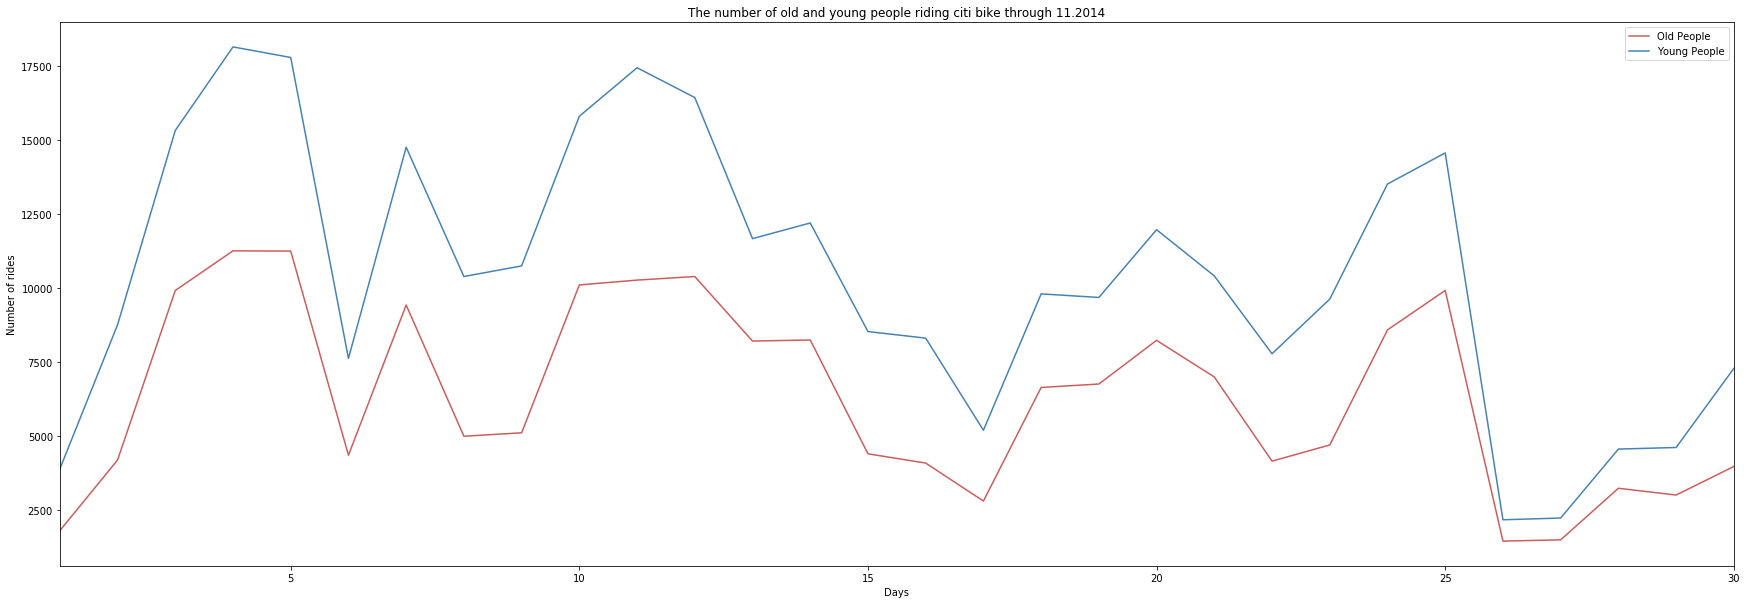

In [13]:
fig = pl.figure(figsize(30,10))

citi_agenum['old'].plot(kind = 'line', color = 'IndianRed', label = 'Old People')
ax = citi_agenum['young'].plot(kind = 'line', color = 'SteelBlue', label = 'Young People')

ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Days")
pl.title("The number of old and young people riding citi bike through 11.2014")
pl.legend()

pl.savefig("The_number_of_old_and_young_people_riding_citi_bike_through_112014.png")

## Figure 1
Here is the line graph about the number of old (age>=45) and young (age<45) people riding citi bike through 11.2014, which shows by days. I use this figure to find the difference between the number of old and young people riding citi bike. From this figure, we can see that the number of young people who ride citi bike in 11.2014 is higher than the number of old people throughout the whole month.

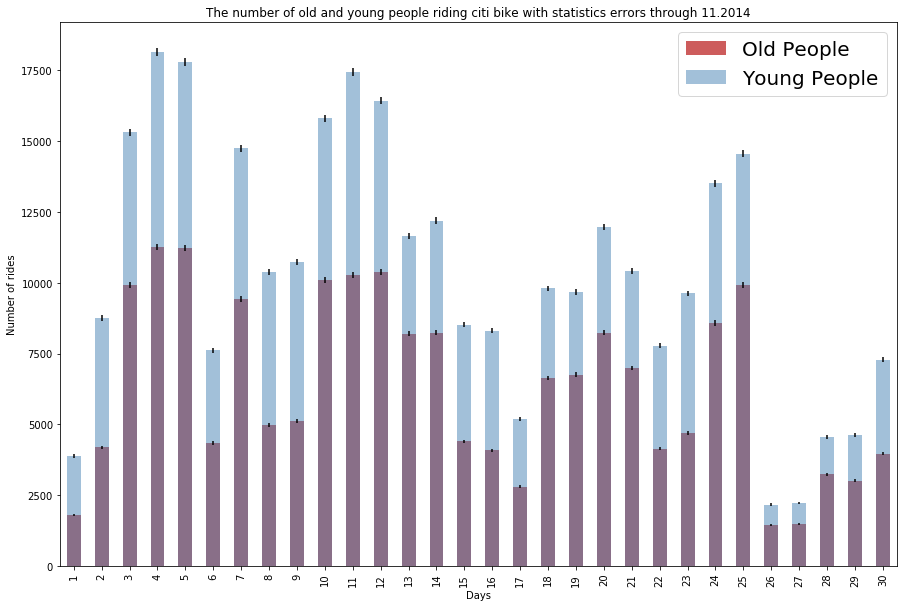

In [14]:
fig=pl.figure(figsize(15,10))

#counts_o = citi_agenum['old']
norm_o = 1
error_o = np.sqrt(citi_agenum['old'])
ax=((citi_agenum['old']) / norm_o).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_o) / norm_o, (error_o) / norm_o)], label='Old People')


#counts_y = citi_agenum['young']
norm_y = 1
error_y=np.sqrt(citi_agenum['young'])
((citi_agenum['young']) / norm_y).plot(kind="bar", alpha=0.5, yerr=[((error_y) / norm_y, (error_y) / norm_y)], 
                           color='SteelBlue', label='Young People')
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Days")
pl.legend(['Old People','Young People'],fontsize=20)
pl.title("The number of old and young people riding citi bike with statistics errors through 11.2014")

pl.savefig("The_number_of_old_and_young_people_riding_citi_bike_with_statistics_errors_through_112014.png")


## Figure 2
Here is the  histogram about the number of old (age>=45) and young (age<45) people riding citi bike through 11.2014, which shows by days. I use this figure to find the difference between the number of old and young people riding citi bike and consider about the error on the count statistics, which shows on the figure. From this figure, we can see that even considering about the error on the count statistics, the number of young people who ride citi bike in 11.2014 is still much higher than the number of old people through the whole month.

Methodology - a description of the methodology (test) chosen, the motivation behind it, a discussion of alternative options that were not adopted. Either this session of the next one should contain figures as well to show the results.

Conclusions - The result and its significance, including the weaknesses and strengths of the analysis. Either this session of the previous one should contain figures as well to show the results.

# Methodology

In this project, I will use the t-test to test the null hypothesis. As the sample size is 30 and we do not know population variance, it is more reasonable to use t-test instead of z-test. What's more, my classmate suggests me to use chi-sq test. But I think the chi-sq test should be used to test proportions data and those data are not categories data. So t-test is better for this project.

![t_test.jpg](t_test.jpg)

![t_test_table.jpg](t_test_table.jpg)

In [15]:
mean_old = mean(citi_agenum['old'])
mean_young = mean(citi_agenum['young'])
std_old = std(citi_agenum['old'])
std_young = std(citi_agenum['young'])
n_old = len(citi_agenum['old'])
n_young = len(citi_agenum['young'])

In [16]:
df_num = n_old+n_young-2

t_score = (mean_old-mean_young)/np.sqrt(
          ((n_old)*np.square(std_old)+(n_young)*np.square(std_young))
          /(n_old+n_young-2)*(1/n_old+1/n_young)
          )

In [17]:
print('zscore is', abs(t_score))
print('The degree of freedom is', df_num)

zscore is 3.98257350289
The degree of freedom is 58


# Conclusions 

As the degree of freedom is 58, the t-score (3.98257350289) is much larger than 1.673 (the t-score at 0.05 significance level). We can reject the null hypothesis and the conclusion is that the number of old people who use Citi bike is less than the number of young people. This analysis clearly tests the usage of Citi Bike at different ages, but it does not have much data points. If I could involve more months of data, the analysis can be better.